In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


In [2]:
sns.set_style('darkgrid')
plt.rcParams['font.size'] = 14
plt.rcParams['figure.figsize'] = (10, 7)
plt.rcParams['figure.facecolor'] = '#FFE5B4'

In [3]:
data = pd.read_csv(r"C:\Users\hp\Downloads\archive (6)\2015.csv")


In [4]:
data.head()

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,Denmark,Western Europe,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,Norway,Western Europe,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,Canada,North America,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176


In [5]:
data_columns = ['Country','Region','Happiness Score','Economy (GDP per Capita)','Family','Health (Life Expectancy)','Freedom','Trust (Government Corruption)','Generosity']

In [6]:
data = data[data_columns].copy()

In [16]:
happy_df = data.rename(columns={'Country': 'country_name', 'Region': 'regional_indicator', 'Happiness Score': 'happiness_score', 'Economy (GDP per Capita)': 'logged_GDP_per_capita', 'Family': 'social_support', 'Health (Life Expectancy)': 'healthy_life_expectancy', 'Freedom': 'freedom_to_make_life_choice', 'Trust (Government Corruption)': 'perception_of_corruption', 'Generosity': 'generosity'})


In [18]:
happy_df.head()

,country_name,regional_indicator,happiness_score,logged_GDP_per_capita,social_support,healthy_life_expectancy,freedom_to_make_life_choice,perception_of_corruption,generosity
0,Switzerland,Western Europe,7.587,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678
1,Iceland,Western Europe,7.561,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630
2,Denmark,Western Europe,7.527,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139
3,Norway,Western Europe,7.522,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699
4,Canada,North America,7.427,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811


In [17]:
happy_df.isnull().sum()

country_name                   0
regional_indicator             0
happiness_score                0
logged_GDP_per_capita          0
social_support                 0
healthy_life_expectancy        0
freedom_to_make_life_choice    0
perception_of_corruption       0
generosity                     0
dtype: int64

Text(0.5, 0, 'Happiness Score')

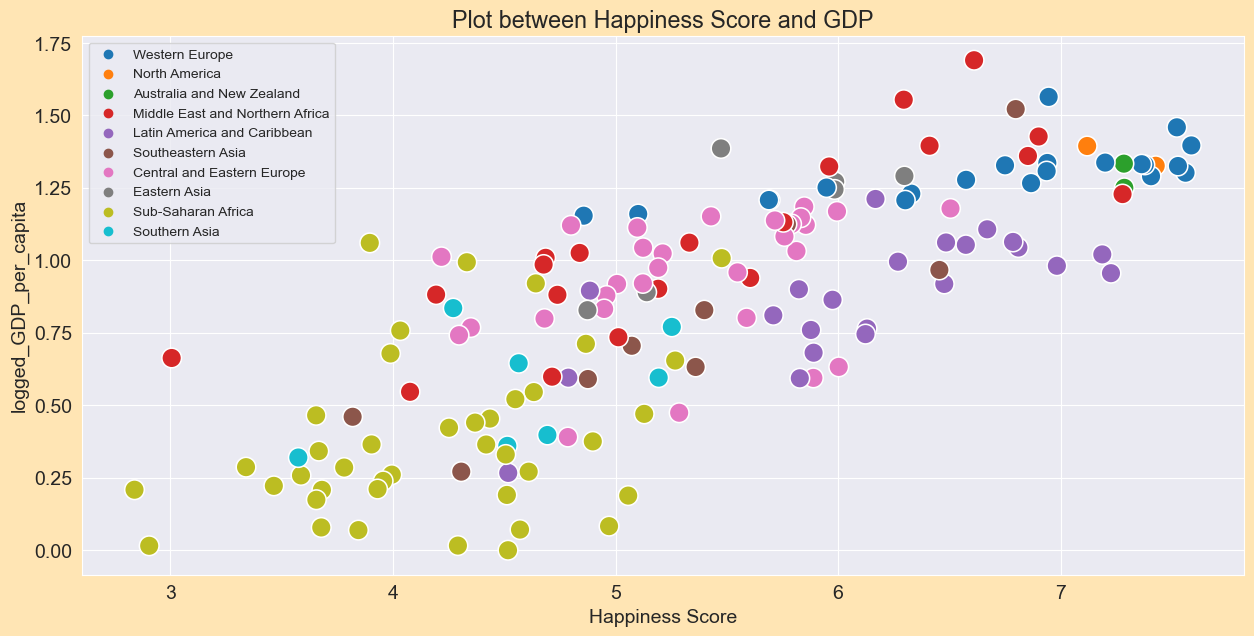

In [20]:
plt.rcParams['figure.figsize'] = (15, 7)
plt.title('Plot between Happiness Score and GDP')
sns.scatterplot(x=happy_df.happiness_score, y=happy_df.logged_GDP_per_capita, hue=happy_df.regional_indicator, s=200)
plt.legend(loc='upper left', fontsize=10)
plt.xlabel('Happiness Score')


In [21]:
gdp_region = happy_df.groupby('regional_indicator')['logged_GDP_per_capita'].sum()
gdp_region

regional_indicator
Australia and New Zealand           2.58376
Central and Eastern Europe         27.33071
Eastern Asia                        6.91068
Latin America and Caribbean        19.28994
Middle East and Northern Africa    21.33947
North America                       2.72080
Southeastern Asia                   7.10149
Southern Asia                       3.92340
Sub-Saharan Africa                 15.21892
Western Europe                     27.27051
Name: logged_GDP_per_capita, dtype: float64

Text(0, 0.5, '')

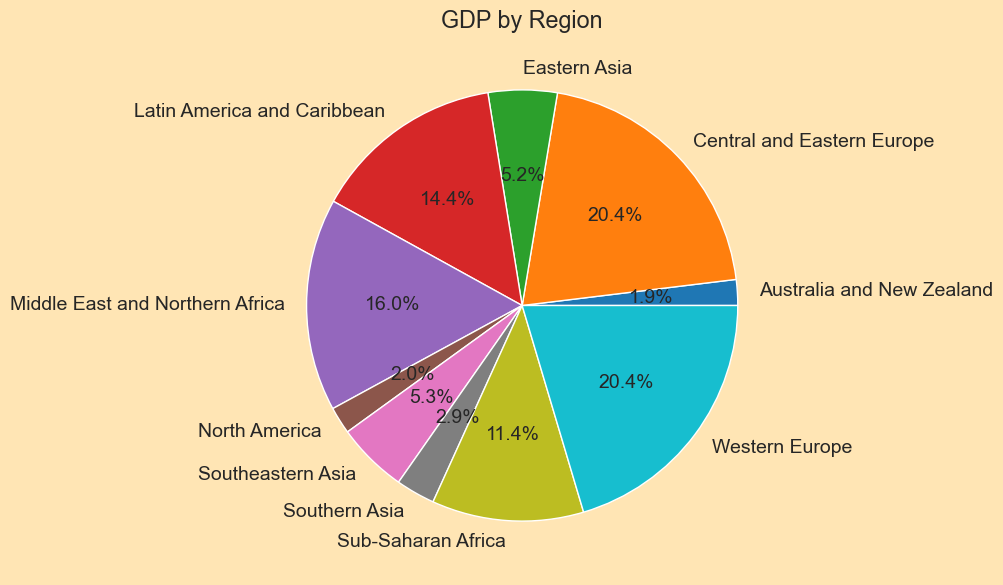

In [22]:
gdp_region.plot.pie(autopct = '%1.1f%%')
plt.title('GDP by Region')
plt.ylabel('')


In [24]:
total_country = happy_df.groupby('regional_indicator')[['country_name']].count()       #total countries
print(total_country)

                                 country_name
regional_indicator                           
Australia and New Zealand                   2
Central and Eastern Europe                 29
Eastern Asia                                6
Latin America and Caribbean                22
Middle East and Northern Africa            20
North America                               2
Southeastern Asia                           9
Southern Asia                               7
Sub-Saharan Africa                         40
Western Europe                             21


C:\Users\hp\AppData\Local\Temp\ipykernel_1748\138697715.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  cor = happy_df.corr(method='pearson')


<Axes: >

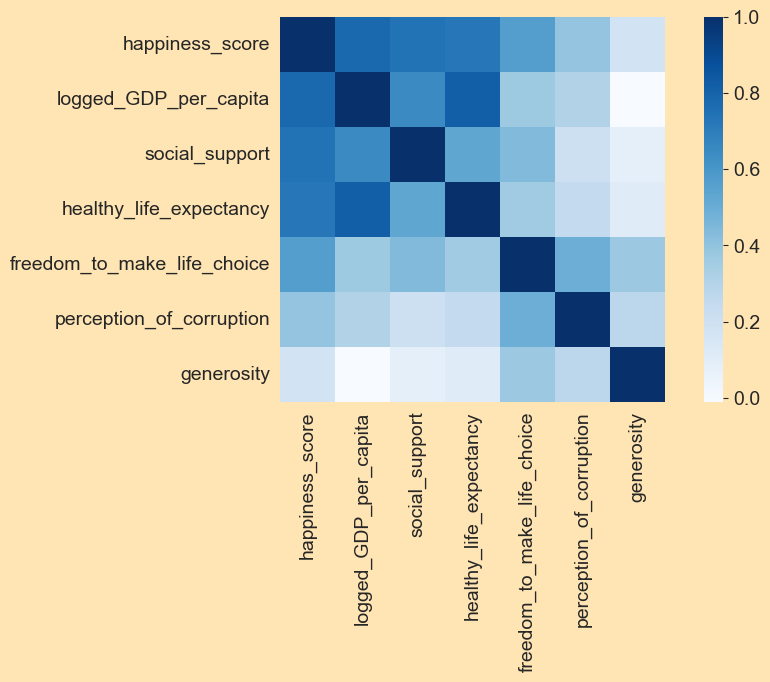

In [28]:
cor = happy_df.corr(method='pearson')
f, ax = plt.subplots(figsize=(10, 5))  
sns.heatmap(cor, cmap="Blues", square=True, ax=ax)


In [32]:
corruption = happy_df.groupby('regional_indicator')[['perception_of_corruption']].mean()
corruption


,perception_of_corruption
regional_indicator,
Australia and New Zealand,0.392795
Central and Eastern Europe,0.086674
Eastern Asia,0.127695
Latin America and Caribbean,0.117172
Middle East and Northern Africa,0.181702
North America,0.244235
Southeastern Asia,0.151276
Southern Asia,0.102536
Sub-Saharan Africa,0.123878


<BarContainer object of 10 artists>

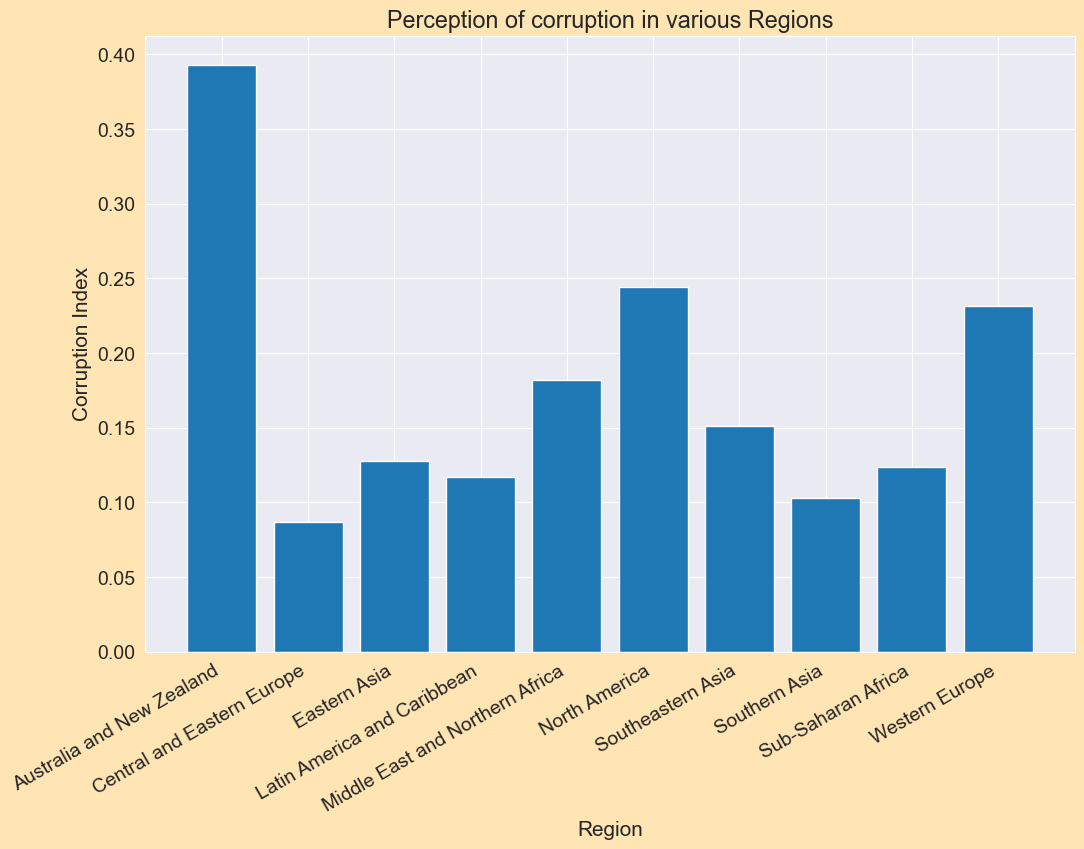

In [34]:
plt.rcParams['figure.figsize'] = (12, 8)
plt.title('Perception of corruption in various Regions')
plt.xlabel('Region',fontsize = 15)
plt.ylabel('Corruption Index', fontsize = 15)
plt.xticks(rotation = 30, ha='right')
plt.bar(corruption.index, corruption.perception_of_corruption)

In [38]:
top_10 = happy_df.head(10)
bottom_10 = happy_df.tail(10)

C:\Users\hp\AppData\Local\Temp\ipykernel_1748\2470642516.py:8: UserWarning: FixedFormatter should only be used together with FixedLocator
  axes[0].set_xticklabels(xlabels_top, rotation=45, ha='right')
C:\Users\hp\AppData\Local\Temp\ipykernel_1748\2470642516.py:17: UserWarning: FixedFormatter should only be used together with FixedLocator
  axes[1].set_xticklabels(xlabels_bottom, rotation=45, ha='right')


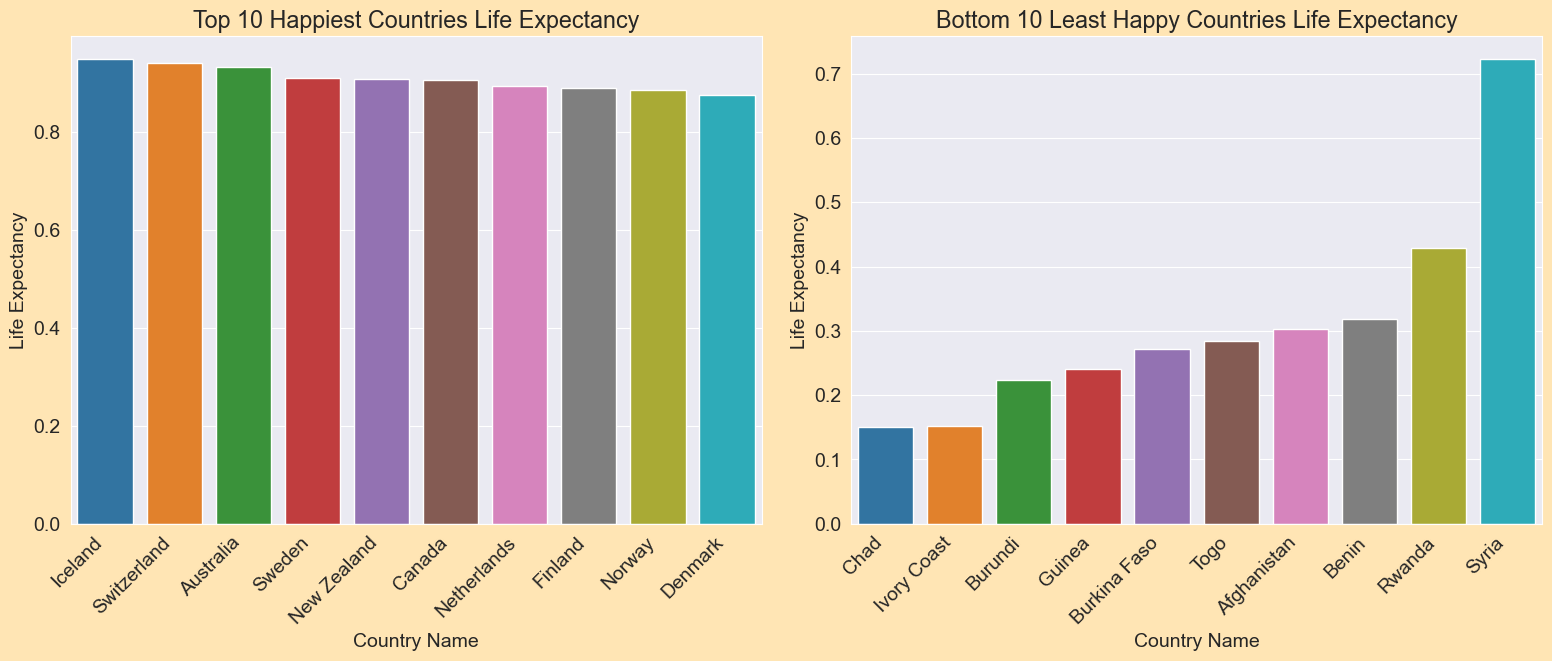

In [39]:
fig, axes = plt.subplots(1, 2, figsize=(16, 6))
plt.tight_layout(pad=2)

# Top 10 happiest countries' life expectancy
top_10 = top_10.sort_values(by='healthy_life_expectancy', ascending=False)  # Sort by life expectancy
xlabels_top = top_10.country_name  # Corrected variable name
axes[0].set_title('Top 10 Happiest Countries Life Expectancy')
axes[0].set_xticklabels(xlabels_top, rotation=45, ha='right')
sns.barplot(x=top_10.country_name, y=top_10.healthy_life_expectancy, ax=axes[0])
axes[0].set_xlabel('Country Name')
axes[0].set_ylabel('Life Expectancy')

# Bottom 10 least happy countries' life expectancy
bottom_10 = bottom_10.sort_values(by='healthy_life_expectancy')  # Sort by life expectancy
xlabels_bottom = bottom_10.country_name  # Corrected variable name
axes[1].set_title('Bottom 10 Least Happy Countries Life Expectancy')
axes[1].set_xticklabels(xlabels_bottom, rotation=45, ha='right')
sns.barplot(x=bottom_10.country_name, y=bottom_10.healthy_life_expectancy, ax=axes[1])
axes[1].set_xlabel('Country Name')
axes[1].set_ylabel('Life Expectancy')

plt.show()


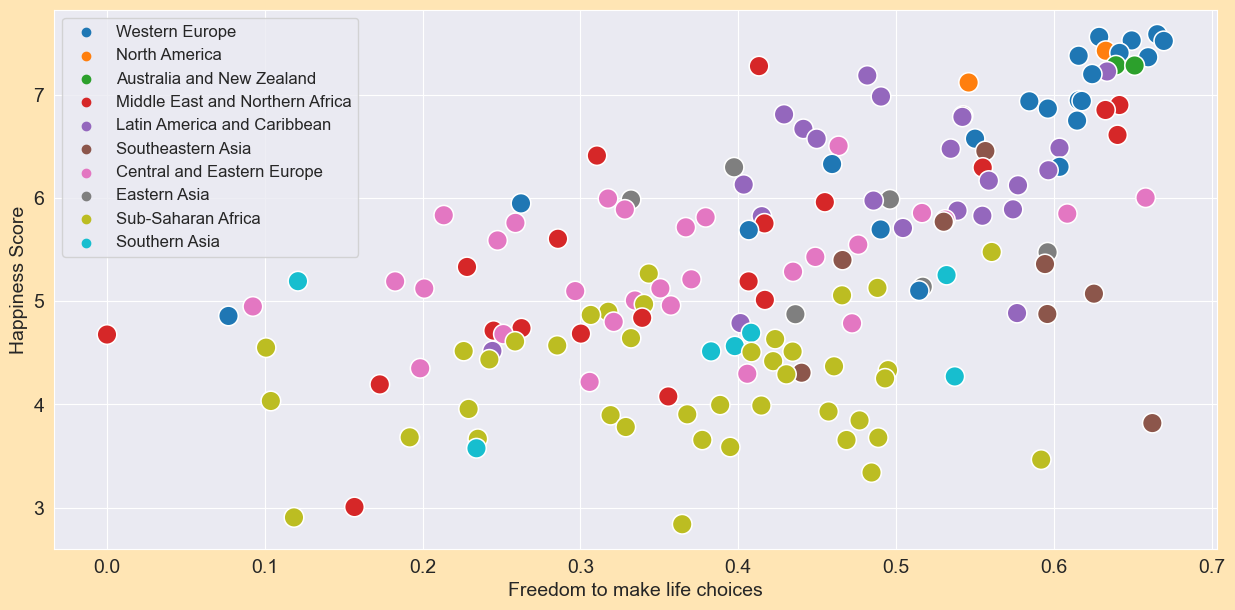

In [41]:
plt.rcParams['figure.figsize'] = (15, 7)
sns.scatterplot(x=happy_df.freedom_to_make_life_choice, y=happy_df.happiness_score, hue=happy_df.regional_indicator, s=200)
plt.legend(loc='upper left', fontsize=12) 
plt.xlabel('Freedom to make life choices')
plt.ylabel('Happiness Score')
plt.show()  


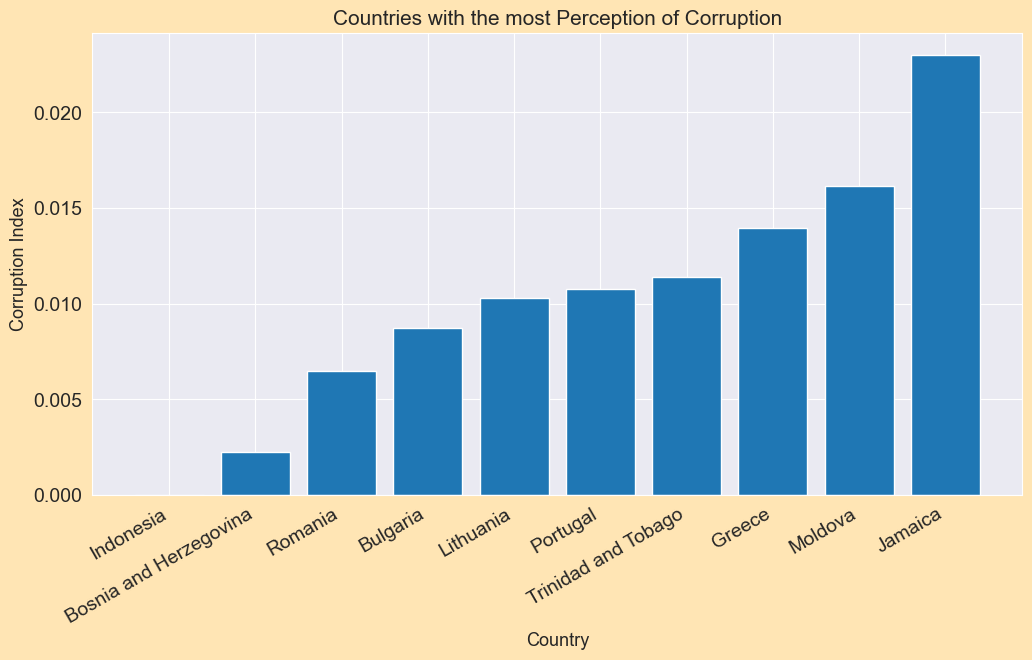

In [43]:
country = happy_df.sort_values(by='perception_of_corruption').head(10)
plt.rcParams['figure.figsize'] = (12, 6)
plt.title('Countries with the most Perception of Corruption', fontsize=15)  
plt.xlabel('Country', fontsize=13)  
plt.ylabel('Corruption Index', fontsize=13)
plt.xticks(rotation=30, ha='right')
plt.bar(country.country_name, country.perception_of_corruption)  
plt.show()  


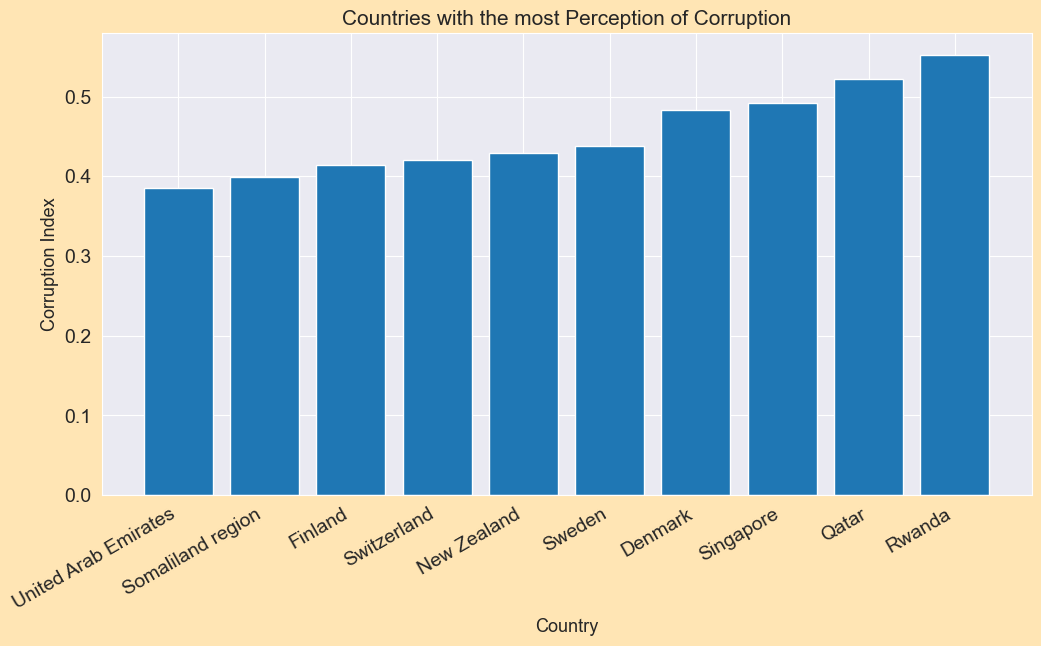

In [44]:
country = happy_df.sort_values(by='perception_of_corruption').tail(10)
plt.rcParams['figure.figsize'] = (12, 6)
plt.title('Countries with the most Perception of Corruption', fontsize=15)  
plt.xlabel('Country', fontsize=13)  
plt.ylabel('Corruption Index', fontsize=13)
plt.xticks(rotation=30, ha='right')
plt.bar(country.country_name, country.perception_of_corruption)  
plt.show()  


Text(0, 0.5, 'Corruption')

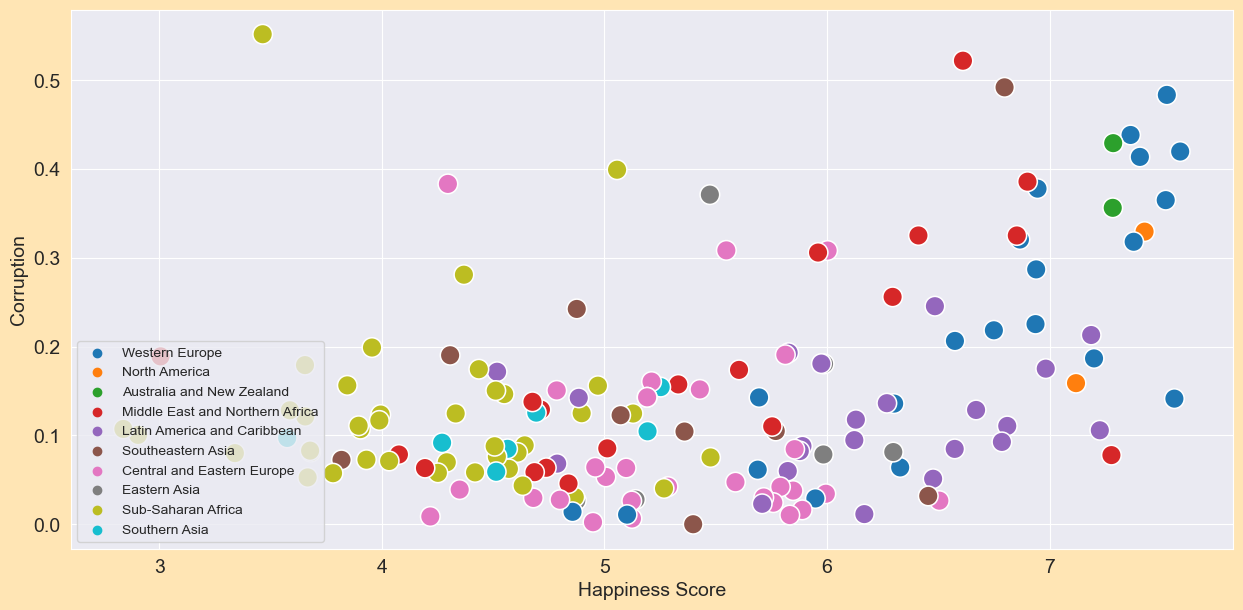

In [46]:
plt.rcParams['figure.figsize'] = (15,7)
sns.scatterplot(x = happy_df.happiness_score, y=happy_df.perception_of_corruption, hue=happy_df.regional_indicator, s=200)
plt.legend(loc = 'lower left' ,fontsize = '10')
plt.xlabel('Happiness Score')
plt.ylabel('Corruption')